In [1]:
from turbustat.simulator import make_3dfield, make_ppv

In [45]:
from turbustat.io.sim_tools import create_fits_hdu

In [46]:
from astropy.io import fits

In [47]:
import numpy as np

In [48]:
import astropy.units as u

In [49]:
from turbustat.statistics import StatMoments

In [50]:
import matplotlib.pyplot as plt

In [24]:
velocity = make_3dfield(32, powerlaw=4., amp=1.,

                        randomseed=98734) * u.km / u.s

In [25]:
density = make_3dfield(32, powerlaw=3., amp=1.,

                       randomseed=328764) * u.cm**-3  

In [26]:
density += density.std()

In [27]:
density[density.value < 0.] = 0. * u.cm**-3 

In [28]:
T = 100 * u.K

In [29]:
cube_hdu = make_ppv(velocity, density, los_axis=0,
                            vel_disp=np.std(velocity, axis=0).mean(),
                            T=T, chan_width=0.5 * u.km / u.s,
                            v_min=-20 * u.km / u.s, v_max=20 * u.km / u.s)

/opt/anaconda3/lib/python3.8/site-packages/astropy/units/quantity.py:1028: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = super().__getitem__(key)


In [30]:
from spectral_cube import SpectralCube  

cube = SpectralCube.read(cube_hdu)  

In [31]:
moments = StatMoments(cube_hdu, radius=5 * u.pix)

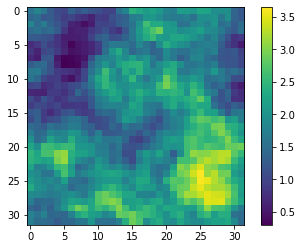

In [32]:
cube.moment0().quicklook()  

plt.colorbar()  

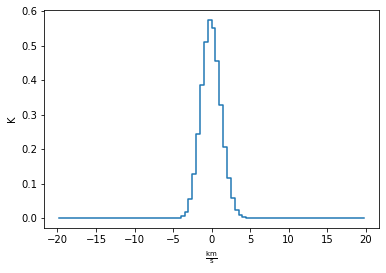

In [33]:
cube.mean(axis=(1,2)).quicklook()

In [34]:
cube_hdu.shape

(80, 32, 32)

In [35]:
from turbustat.statistics import PowerSpectrum

In [37]:
from turbustat.simulator import make_extended

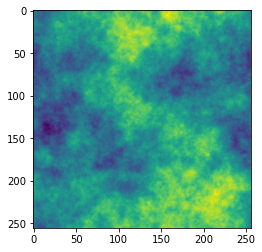

In [39]:
tank1_img = make_extended(256, powerlaw=3.)
plt.imshow(tank1_img)

In [41]:
tank12D_hdu = fits.PrimaryHDU(tank1_img)

In [42]:
pspec = PowerSpectrum(tank12D_hdu)

/opt/anaconda3/lib/python3.8/site-packages/turbustat/statistics/base_statistic.py:66: UserWarning: Header missing beam information.
  warn("Header missing beam information.")


/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            WLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.999e+06
Date:                Mon, 22 Mar 2021   Prob (F-statistic):               0.00
Time:                        21:36:50   Log-Likelihood:                 875.33
No. Observations:                 177   AIC:                            -1747.
Df Residuals:                     175   BIC:                            -1740.
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2873      0.001   3925.779      0.0

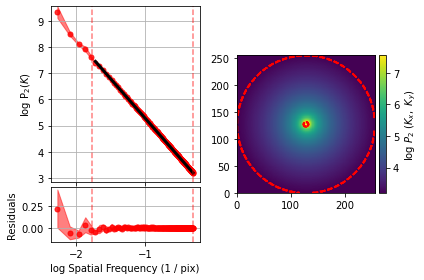

In [43]:
pspec.run(verbose=True, radial_pspec_kwargs={'binsize': 1.0},
...           fit_kwargs={'weighted_fit': True}, fit_2D=False,
...           low_cut=1. / (60 * u.pix))

In [44]:
# Another example 3-D data

In [52]:
cube = np.ones((8, 16, 16))
pixel_scale = 0.001 * u.deg
spec_pixel_scale = 1000. * u.m / u.s
beamfwhm = 0.003 * u.deg
imshape = cube.shape
restfreq = 1.4 * u.GHz
bunit = u.K
cube_hdu = create_fits_hdu(cube, pixel_scale, spec_pixel_scale, beamfwhm, imshape, restfreq, bunit)

In [57]:
#cube_hdu can now be passed to the TurbuStat statistics, or loaded into a spectral_cube.SpectralCube with SpectralCube.read(cube_hdu) 

In [53]:
# For a two-dimensional image, the FITS HDU can be made in almost the same way, minus spec_pixel_scale:

In [54]:
img = np.ones((16, 16))
imshape = img.shape
img_hdu = create_fits_hdu(img, pixel_scale, beamfwhm, imshape, restfreq, bunit)

In [56]:
#The FITS HDU can be given to TurbuStat statistics, or converted to a spectral_cube.Projection with Projection.from_hdu(img_hdu).

In [58]:
#Principal Component Analysis (PCA) is primarily a dimensionality reduction technique. Generally the data are arranged into a set of columns (representing dimensions or variables) and the set of samples is contained within each row. A covariance matrix is then constructed between each pair of columns. Performing an eigenvalue decomposition of this matrix gives an orthogonal basis for the data, the components of which are the principal components (eigenvectors). The associated eigenvalues correspond to the variance in the data described by each principal component.

In [60]:
from turbustat.statistics import PCA

In [70]:
pca = PCA(cube_hdu, distance=250. * u.pc)

In [73]:
#pca.run(verbose=True, min_eigval=1e-4, spatial_output_unit=u.pc,spectral_output_unit=u.m / u.s, brunt_beamcorrect=False)

In [74]:
pwd

'/Users/qfm954'